# Домашнее задание №2. Часть №2.
*Волошина Екатерина, БКЛ-182*

## Проверка на PEP-8

In [1]:
%load_ext pycodestyle_magic
%flake8_on

## Задание №1. Датафрейм.
Для начала импортируем модули, которые понадобятся нам в дальнейшем.

In [52]:
import pandas as pd

In [53]:
import matplotlib.pyplot as plt

In [54]:
%matplotlib inline

In [55]:
import seaborn as sns
import random
random.seed = 23

Импортируем также модуль json.

In [5]:
import json

Открываем разбор Mystem и записываем его в файл.

In [6]:
with open('mystem.json', 'r', encoding='utf-8') as file:
    text = json.load(file)

Для каждого разбора из MyStem создаем словарь вида {категория : показатель}.

In [10]:
def analyze(ana, an_d):
    gender = ('муж', 'жен', 'сред', 'мж')  # род
    an_d['gender'] = ' '.join([i for i in gender if i in ana])
    case = (
        'им', 'род', 'дат', 'вин', 'твор', 'пр', 'парт', 'местн', 'зват'
    )  # падеж
    an_d['case'] = ' '.join([i for i in case if i in ana])
    tense = ('прош', 'непрош')  # время
    an_d['tense'] = ' '.join([i for i in tense if i in ana])
    number = ('ед', 'мн')  # число
    an_d['number'] = ' '.join([i for i in number if i in ana])
    anim = ('од', 'неод')  # одушевленность
    an_d['anim'] = ' '.join([i for i in anim if i in ana])
    mood = ('изъяв', 'пов')  # наклонение
    an_d['mood'] = ' '.join([i for i in mood if i in ana])
    person = ('1-л', '2-л', '3-л')  # лицо
    an_d['person'] = ' '.join([i for i in person if i in ana])
    aspect = ('несов', 'сов')  # вид
    an_d['aspect'] = ' '.join([i for i in aspect if i in ana])
    trans = ('пе', 'нп')  # переходность
    an_d['trans'] = ' '.join([i for i in trans if i in ana])
    voice = ('дейст', 'страд')  # залог
    an_d['voice'] = ' '.join([i for i in voice if i in ana])
    verb_form = ('деепр', 'инф', 'прич')  # форма глагола
    an_d['verb_form'] = ' '.join([i for i in verb_form if i in ana])
    form = ('кр', 'полн', 'притяж')  # форма прилагательного
    an_d['agj_form'] = ' '.join([i for i in form if i in ana])
    compar = ('прев', 'срав')  # степень сравнения
    an_d['compar'] = ' '.join([i for i in compar if i in ana])
    extra = (
        'вводн', 'гео', 'затр', 'имя', 'искаж', 'обсц', 'отч', 'прдк',
        'разг', 'редк', 'сокр', 'устар', 'фам'
    )  # дополнительные параметры
    for i in extra:
        if i in ana:
            an_d[i] = i
        else:
            an_d[i] = ''
    return an_d

Импортируем re и OrderedDict для дальнейшей работы с выдачей.

In [11]:
import re
from collections import OrderedDict

Создаем пустой список, в который упорядоченный словарь с лексемой, токеном и разбором. Если вариантов разбора больше одного, выбираем первый.

In [14]:
word_list = []
for i in text:
    if 'analysis' in i:
        if i['analysis'] != []:
            ana_dict = {}  # создаем пустой словарь для разбора
            ana_dict['lex'] = i['analysis'][0]['lex']  # лексема
            ana_dict['word'] = i['text']  # словоформа
            ana = i['analysis'][0]['gr']
            if '=(' in ana:  # оставляем один вариант разбора
                ana = re.sub(r'=\(([^|]+)\|[^\)]+\)', r',\1', ana)
            ana = ana.replace('=', ',')
            ana = ana.split(',')
            pos = ana[0]
            ana_dict['pos'] = pos  # часть речи
            ana_dict = analyze(ana, ana_dict)  # разбор
        if ana_dict is not None:
            word_list.append(OrderedDict(ana_dict))

Делаем датафрейм из списка словарей:

In [15]:
stendal = pd.DataFrame(word_list)
stendal

,lex,word,pos,gender,case,tense,number,anim,mood,person,...,имя,искаж,обсц,отч,прдк,разг,редк,сокр,устар,фам
0,стендаль,Стендаль,S,муж,им,,ед,од,,,...,,,,,,,,,,фам
1,красный,Красное,A,сред,вин,,ед,,,,...,,,,,,,,,,
2,и,и,CONJ,,,,,,,,...,,,,,,,,,,
3,черный,черное,A,сред,вин,,ед,,,,...,,,,,,,,,,
4,изда,Изд,S,жен,вин,,мн,од,,,...,,,обсц,,,,,,,
5,правда,Правда,ADV,,,,,,,,...,,,,,,,,,,
6,москва,Москва,S,жен,им,,ед,неод,,,...,,,,,,,,,,
7,г,г,S,,пр,,мн,,,,...,,,,,,,,сокр,,
8,г,г,S,,пр,,мн,,,,...,,,,,,,,сокр,,
9,палек,Палек,S,муж,им,,ед,од,,,...,,,,,,,,,,


## Задание 2. Графики из семинара.

Повторим три графика из семинара.
### График 1. Длина слов

Text(0.5, 0, 'Length of word')

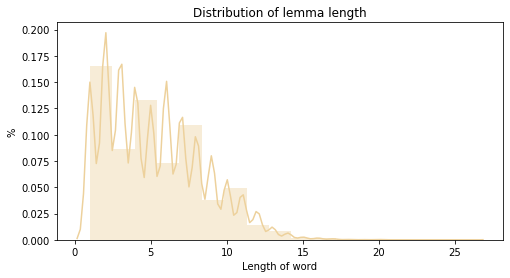

In [16]:
stendal['length'] = stendal['lex'].apply(len)
plt.figure(figsize=(8, 4))
sns.distplot(stendal['length'], bins=17, color='#edd19c')
plt.title('Distribution of lemma length')
plt.ylabel('%')
plt.xlabel('Length of word')

### График 2. Части речи и распределение по полу

Text(0, 0.5, 'number of entries')

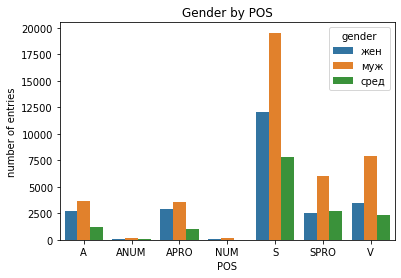

In [17]:
df2 = stendal[
    (stendal['gender'] != '') & (stendal['gender'] != 'мж')
][
    ['pos', 'gender', 'number']
].groupby(['pos', 'gender'], as_index=False).count()

df2.columns = ['pos', 'gender', 'total']
sns.barplot(x="pos", y="total", hue='gender', data=df2)
plt.title('Gender by POS')
plt.xlabel('POS')
plt.ylabel('number of entries')

### График 3. Распределение по частям речи

In [22]:
df = stendal[
    ['lex', 'pos', 'gender']
].groupby(['lex', 'pos'], as_index=False).count()
df.columns = ['lex', 'pos', 'total']
df = df[df['total'] > 10]

Text(0.5, 0, 'POS')

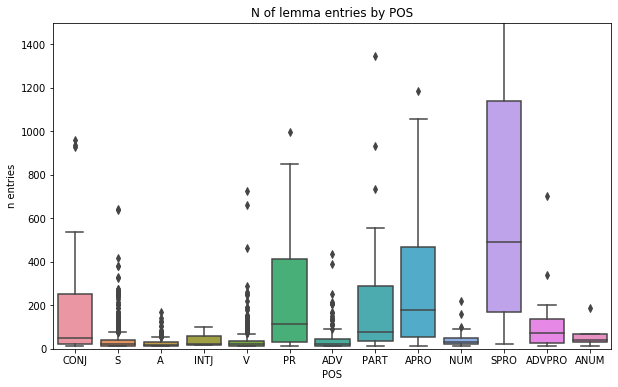

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="pos", y="total", data=df)
plt.ylim((0, 1500))
plt.title('N of lemma entries by POS')
plt.ylabel('n entries')
plt.xlabel('POS')

## Задание 3. Свои графики

### График 1. 
Создадим круговую диаграмму, которая покажет распределение глаголов по времени. 
Основное время повествования в романе - прошедшее, но многие сюжетные линии связаны с планами главного героя на будущее: следовательно, какова доля глаголов непрошедшего времени в романе?
Так как существует только один параметр (время глагола), испольщуем 

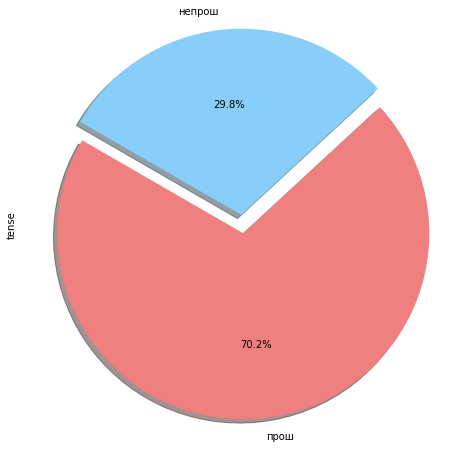

In [30]:
plt.figure(figsize=(8, 8))  # размер графика
colors = ['lightcoral', 'lightskyblue']  # цвета графика
explode = (0.1, 0)  # отделим одну долю от другой

stendal[stendal['tense'] != '']['tense'].value_counts().plot.pie(
    explode=explode,
    colors=colors,
    autopct='%1.1f%%',  # представление в процентах
    shadow=True,  # тень
    startangle=150
)

plt.axis('equal')
plt.show()

### График 2.
Теперь создадим облако слов. Чтобы было интересней, сделаем его на основе картинки. Так как роман (в том числе и) о любви и написан французским писателем, то картинкой будет сердце, раскрашенное в цвета французского флага :)

Импортируем нужные модули и функции.

In [31]:
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
import numpy as np
from PIL import Image

Создаем множество стоп-слов с помощью nltk и добавляем допольнительные:

In [32]:
stop_words = set(stopwords.words('russian') + ['свой', 'весь', 'это', 'который'])

Создаем маску для облака слов из картинки, которая лежит в папке:

In [33]:
heart_mask = np.array(Image.open("france.png"))

Теперь создаем строку из лемм всех слов романа, за исключением стоп-слов.

In [80]:
text = ' '.join([
    word for word in stendal['lex'].values if word not in stop_words
])

Создаем само облако слов:

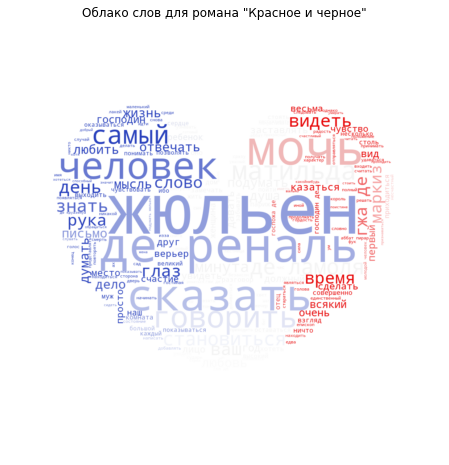

In [81]:
wordcloud = WordCloud(
    background_color='white',
    width=800,  # ширина
    height=800,  # высота
    mask=heart_mask  # маска
).generate(text)
image_colors = ImageColorGenerator(heart_mask)  # цвета картинки

plt.figure(figsize=(8, 8))  # размер графика
wordcloud = wordcloud.recolor(color_func=image_colors)  # перекрашиваем график
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Облако слов для романа "Красное и черное"')
plt.axis('off')
plt.show()

### График 3. Частота имен собственных
На каждые 10 тысяч слов считаем, сколько имен собственных встретилось.
Ось Х - количество слов в целом (читаем по 10000),  ось Y - сколько имен собственных встретилось на 10000 слов. Используем обычный график, чтобы было заметно изменение показателя.

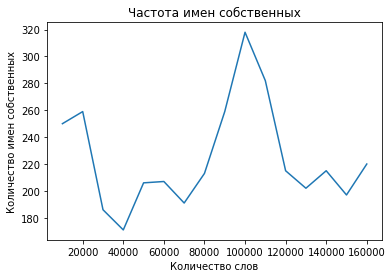

In [92]:
x_list = []
y_list = []
print(word_list[1]['гео'])
for i in range(10000, len(word_list), 10000):
    counter = 0
    for a in range(i-10000, i):
        word = word_list[a]
        if word['фам'] != '' or word['имя'] != '' or word['гео'] != '':
            counter += 1
    y_list.append(counter)
    x_list.append(i)

plt.plot(x_list, y_list)
plt.title('Частота имен собственных')
plt.ylabel('Количество имен собственных')  # подпись оси Х
plt.xlabel('Количество слов')  # подпись оси Y
plt.show()

## Задание 4. Lexical Dispersion Plot
Импортируем модуль nltk:

In [39]:
import nltk

Выбирем героев: главного героя (Жюльен), его возлюбленную (Матильду) и семью де Реналей, также сыгрвашую важную роль в романе.

In [45]:
words = ['жюльен', 'матильда', 'реналь']
text = list(stendal['lex'])  # лемматизованный текст романа

Теперь построим график:

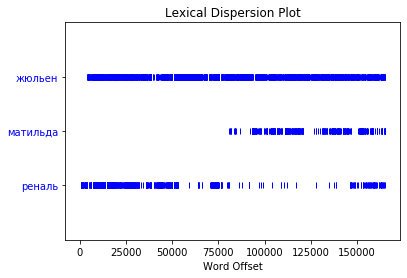

In [46]:
from nltk.draw import dispersion_plot
dispersion_plot(text, words)